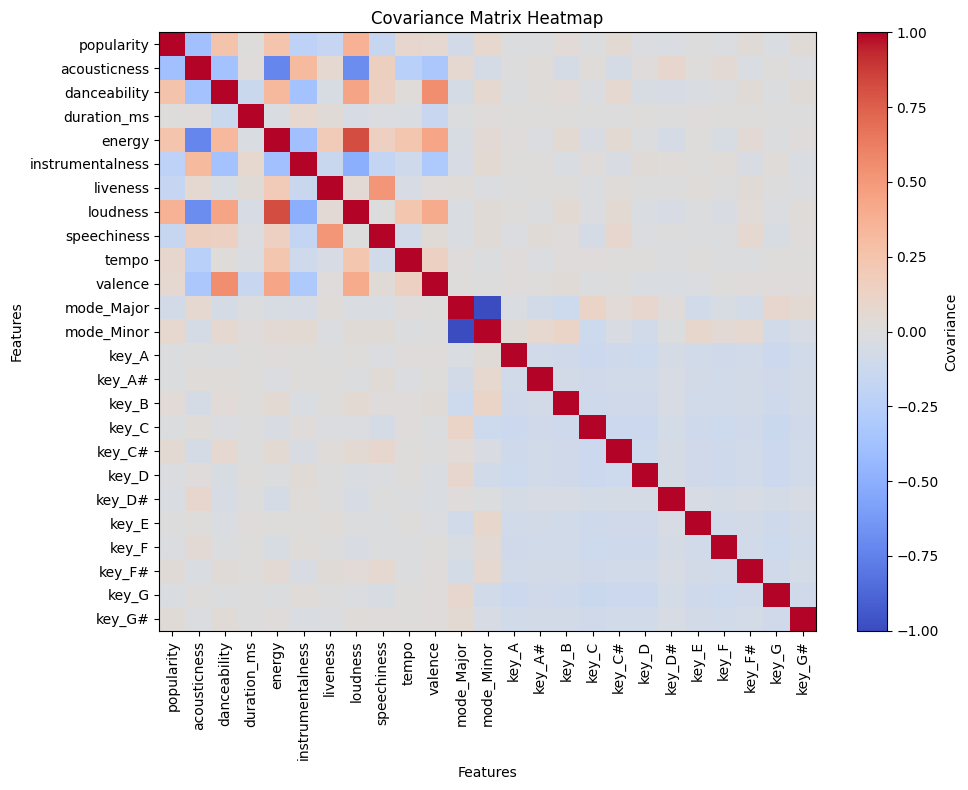

None


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_and_plot_covariance_matrix(name, test_size):
    # Load and shuffle data
    data_file = pd.read_csv(name)
    data_file = data_file.sample(frac=1).reset_index(drop=True)
    
    # Drop unnecessary columns
    data_file.pop("artist_name")
    data_file.pop("track_name")
    data_file.pop("track_id")
    data_file.pop("time_signature")

    # Extract genre data and one-hot encode
    genre_data = data_file.pop("genre")
    data_file = pd.get_dummies(data_file, columns=["mode", "key"], dtype=int)
    genre_data = pd.get_dummies(genre_data, dtype=int)

    # Normalize numerical data
    data_file = (data_file - data_file.mean()) / data_file.std()

    # Split the data into training and test sets
    index = round((1 - test_size) * len(data_file))
    X_Train = data_file[:index]
    x_test = data_file[index:]
    
    # Combine training and test data for covariance calculation
    combined_data = pd.concat([X_Train, x_test], axis=0)
    
    # Compute covariance matrix
    covariance_matrix = combined_data.cov()

    # Plot the covariance matrix as a heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(covariance_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar(label='Covariance')
    plt.title('Covariance Matrix Heatmap')
    plt.xlabel('Features')
    plt.ylabel('Features')
    plt.xticks(range(len(covariance_matrix.columns)), covariance_matrix.columns, rotation=90)
    plt.yticks(range(len(covariance_matrix.index)), covariance_matrix.index)
    plt.tight_layout()
    plt.show()

# Example usage
# Replace 'data.csv' with your dataset filename
# calculate_and_plot_covariance_matrix('data.csv', test_size=0.2)




covariance_matrix = calculate_and_plot_covariance_matrix('Spotify_Features.csv', test_size=0.2)
print(covariance_matrix)